## 1. Resampling Imbalanced Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/creditcard_small.csv')
# df = df.loc[df.Class==1, :].append(df.loc[df.Class==0, :].sample(5000))
X = df.iloc[:,:-1]
y = df.iloc[:,-1].map({1:'Fraud', 0:'No Fraud'})

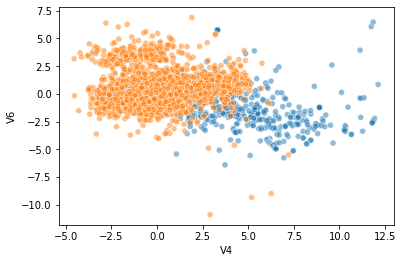

In [3]:
sns.scatterplot(X.V4, X.V6, y, alpha=.5, legend=False)
# plt.savefig("distribution.png", dpi=300)

In [4]:
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC
X_resampled, y_resampled = SMOTE(sampling_strategy='minority').fit_resample(X, y)
X_resampled, y_resampled = SMOTE(sampling_strategy={"Fraud":1000}).fit_resample(X, y)
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

Using TensorFlow backend.
/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

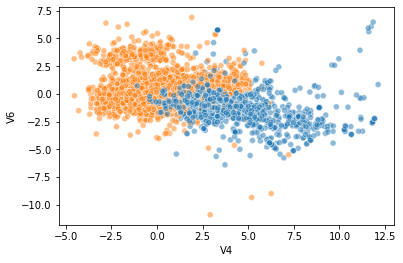

In [5]:
sns.scatterplot(X_resampled.V4, X_resampled.V6, y_resampled, alpha=.5, legend=False)
# plt.savefig("resampled.png", dpi=300)

## 2. Creating New Features

In [4]:
turnover_df = pd.read_csv('data/turnover.csv')
turnover_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
import featuretools as ft
import pandas as pd

# Create Entity
turnover_df = pd.read_csv('data/turnover.csv')
es = ft.EntitySet(id = 'Turnover')
es.entity_from_dataframe(entity_id = 'hr', dataframe = turnover_df, index = 'index')

# Run deep feature synthesis with transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'hr',
                                      trans_primitives = ['add_numeric', 'multiply_numeric'], verbose=True)

ModuleNotFoundError: No module named 'featuretools'

In [8]:
feature_matrix[feature_matrix.columns[10:20]].head()

,average_montly_hours + satisfaction_level,number_project + promotion_last_5years,left + number_project,average_montly_hours + promotion_last_5years,left + Work_accident,average_montly_hours + left,number_project + satisfaction_level,promotion_last_5years + satisfaction_level,last_evaluation + time_spend_company,promotion_last_5years + Work_accident
index,,,,,,,,,,
0,157.38,2,3,157,1,158,2.38,0.38,3.53,0
1,262.80,5,6,262,1,263,5.80,0.80,6.86,0
2,272.11,7,8,272,1,273,7.11,0.11,4.88,0
3,223.72,5,6,223,1,224,5.72,0.72,5.87,0
4,159.37,2,3,159,1,160,2.37,0.37,3.52,0


## 3. Handling Missing Values

In [9]:
# explicitly require this experimental feature
# now you can import normally from sklearn.impute
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load data
titanic = pd.read_csv("titanic.csv")
titanic = titanic.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# Run imputer with a Random Forest estimator
imp = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
titanic = pd.DataFrame(imp.fit_transform(titanic), columns=titanic.columns)

/home/israr/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/israr/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 4. Outlier Detection

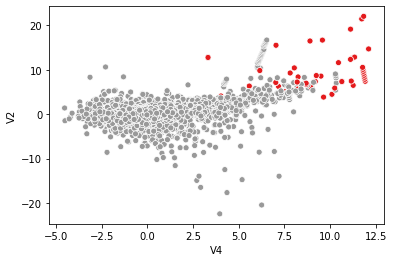

In [10]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import seaborn as sns

credit_card = pd.read_csv('creditcard_small.csv').drop("Class", 1)
clf = IsolationForest(contamination=0.01, behaviour='new')
outliers = clf.fit_predict(credit_card)
sns.scatterplot(credit_card.V4, credit_card.V2, outliers, palette='Set1', legend=False)
# plt.savefig('outliers.png', dpi=300)